In [87]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import glob
import sys

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

import torch
import torch.nn as nn

import lat_dataset_load_new_lightning

from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")
    

Utilizing CUDA


In [3]:
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Results for CNN/"
file_format_list = ["configs-100-5*.dat"]
lat_size = [5,100]
dim = len(lat_size)
conf_size = np.concatenate(([2],[dim],lat_size))
dataset_output_size = np.concatenate(([np.prod(conf_size[0:2])],conf_size[2:]))

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase"]

dataset = lat_dataset_load_new_lightning.kl_dataset(conf_file_dir, file_format_list, conf_size, dataset_output_size, label_names, labels_in_file_name, transform=None, device=device)

[ -1   2   2   5 100]


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.050.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)


first example loaded:
{'conf': tensor([[[[ 1,  0,  0,  ...,  0,  2,  1],
          [ 0,  1,  0,  ...,  2,  0,  0],
          [ 2,  1,  3,  ...,  1,  1,  2],
          [ 0,  0, -1,  ...,  1,  0,  1],
          [ 1,  2,  2,  ...,  0,  1,  0]],

         [[ 0,  0,  0,  ...,  1, -2,  1],
          [ 0, -1,  1,  ...,  0,  0,  1],
          [ 0,  0, -1,  ...,  0,  0,  0],
          [ 1,  0,  0,  ...,  0,  1, -1],
          [ 0, -1,  0,  ...,  0,  0,  0]]],


        [[[ 0,  1,  0,  ...,  0,  0,  0],
          [ 0,  0,  1,  ...,  0,  1,  1],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  0,  1,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]]]), 'mu': tensor(1.0500), 'phase': tensor(1.), 'n': tensor(0.8000, dtype=torch.float64), 'phi2': tensor(0.4983, dtype=tor


Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.955.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.990.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.970.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.045.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.005.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.980.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.040.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.030.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.015.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.940.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.010.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.000.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.915.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.025.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.950.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.930.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.960.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.925.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.995.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.020.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.985.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.910.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-1.035.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.945.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.965.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.935.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)



Read conf file /media/data/sbulusu/datasets/complexworm/Results for CNN/configs-100-5-4.010-1.000-0.920.dat with size :torch.Size([5000, 2, 2, 5, 100])
skipping 0.3 of configurations (warm up)




last example loaded:
{'conf': tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 1, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 1, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]]), 'mu': tensor(0.9200), 'phase': tensor(0.), 'n': tensor(0., dtype=torch.float64), 'phi2': tensor(0.2521, dtype=torch.float64), 'id': 101499}


In [4]:
example = dataset.data[0]

example_conf = example["conf"]
example_phi2 = example["phi2"]

print(example_conf.shape)

torch.Size([2, 2, 5, 100])


In [5]:
print(example_phi2)

tensor(0.4983, dtype=torch.float64)


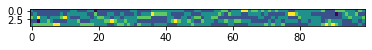

In [6]:
example_k_links = example_conf[0]
plt.imshow(example_k_links[0])

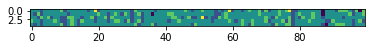

In [7]:
plt.imshow(example_k_links[1])

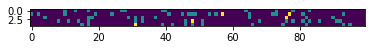

In [8]:
example_l_links = example_conf[1]
plt.imshow(example_l_links[1])

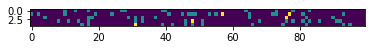

In [9]:
plt.imshow(example_l_links[1])

In [10]:
"""plot phase transition"""

ns = torch.zeros(len(dataset.data))
phi2s = torch.zeros(len(dataset.data))
mus = torch.zeros(len(dataset.data))

"plot observables against mu"
for i in range(len(dataset.data)):
    
    conf = dataset.data[i]["conf"]
    k_links = conf[0,:2]
    kllinks = conf[0,2:]
    
    phi2 = dataset.data[i]["phi2"]
    n = dataset.data[i]["n"]
    
    phi2s[i] = float(phi2)
    ns[i] = float(n)
    
    mu = dataset.data[i]["mu"]
    mus[i] = mu

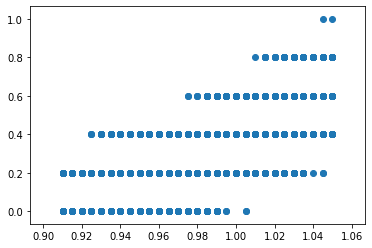

In [11]:
plt.scatter(mus, ns)

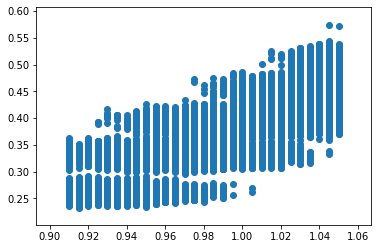

In [12]:
plt.scatter(mus, phi2s)

In [ ]:
unique_mus = np.unique(mus)
num_mus = len(unique_mus)

In [ ]:
##to be able to plot the observables against mu, they have to be sorted with respect to it
phi2s_mu = []
ns_mu = []

for mu_val in unique_mus:
    ##find which examples have a particular mu value (mu_val)
    mu_loc = np.where(mus == mu_val)[0]
    ##find the labels and prediction of observables which correspond to these examples
    phi2_mu = phi2s[mu_loc]
    n_mu = ns[mu_loc]
    
    phi2s_mu = phis_mu
    ns_mu = n_mu

        
phi2s_mu = torch.tensor(phi2s_mu)
ns_mu = torch.tensor(ns_mu)

In [ ]:
for mu_i in range(len(unique_mus))
mean_phi2s_mu[i] = torch.mean(phi2s_mu, )

In [30]:
"""plot k and l link distribution"""

dataset_links_shape = np.concatenate(([len(dataset)],[len(lat_size)],lat_size))
dataset_k_links = torch.zeros(*dataset_links_shape, dtype=int)
dataset_l_links = torch.zeros(*dataset_links_shape, dtype=int)
print(dataset_k_links.size())

torch.Size([101500, 2, 5, 100])


In [31]:
for i in tqdm(range(len(dataset))):
    dataset_k_links[i] = dataset.data[i]["conf"][0]
    dataset_l_links[i] = dataset.data[i]["conf"][1]
    

In [32]:
dataset_k_links_flat = torch.flatten(dataset_k_links, start_dim=1)
dataset_l_links_flat = torch.flatten(dataset_l_links, start_dim=1)

(array([  5.,  82., 528., 296.,  89.]),
 array([-2., -1.,  0.,  1.,  2.,  3.]),
 <a list of 5 Patch objects>)

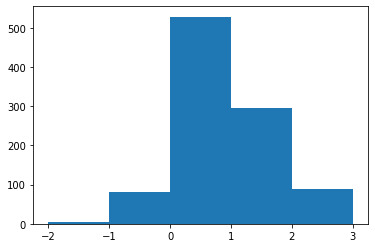

In [41]:
conf_i = 0

dataset_k_links_flat = torch.flatten(dataset_k_links, start_dim=1)
max_k_link = torch.max(dataset_k_links_flat[conf_i])
min_k_link = torch.min(dataset_k_links_flat[conf_i])

plt.hist(dataset_k_links_flat[conf_i], bins=(max_k_link-min_k_link))

(array([873., 127.]), array([0., 1., 2.]), <a list of 2 Patch objects>)

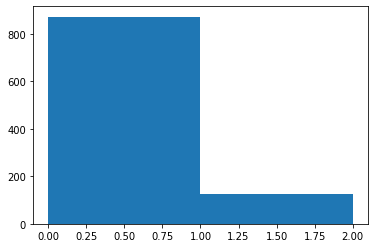

In [53]:
conf_i = 0

dataset_l_links_flat = torch.flatten(dataset_l_links, start_dim=1)
max_l_link = torch.max(dataset_l_links_flat[conf_i])
min_l_link = torch.min(dataset_l_links_flat[conf_i])

plt.hist(dataset_l_links_flat[conf_i], bins=(max_l_link-min_l_link))

In [77]:
conf_i_start = 20
conf_i_stop = 40
conf_range = np.arange(conf_i_start,conf_i_stop,dtype=int)

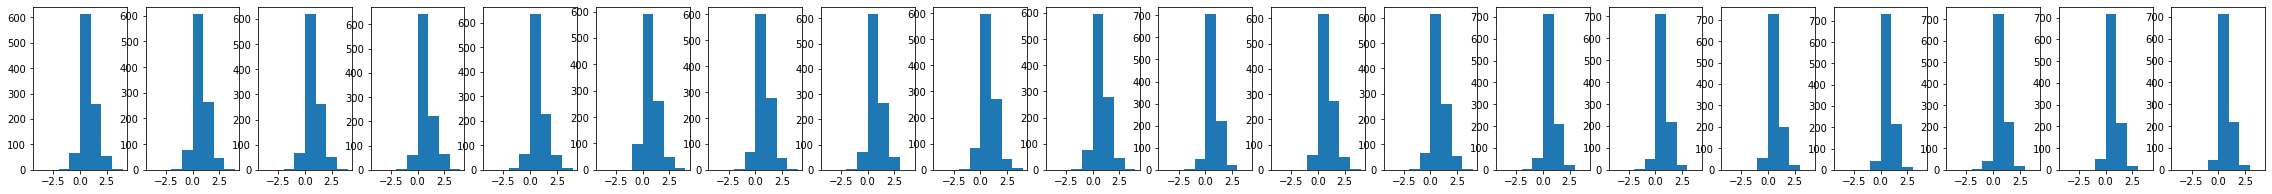

In [80]:
plt.rcParams['figure.figsize'] = [40, 3]
fig, ax = plt.subplots(nrows=1, ncols=len(conf_range))

max_k_link = torch.max(dataset_k_links_flat)
min_k_link = torch.min(dataset_k_links_flat)

bins = np.arange(min_k_link, max_k_link, dtype=int)

for i in range(len(conf_range)):
    conf_i = conf_range[i]
    ax[i].hist(dataset_k_links_flat[conf_i], bins=bins)

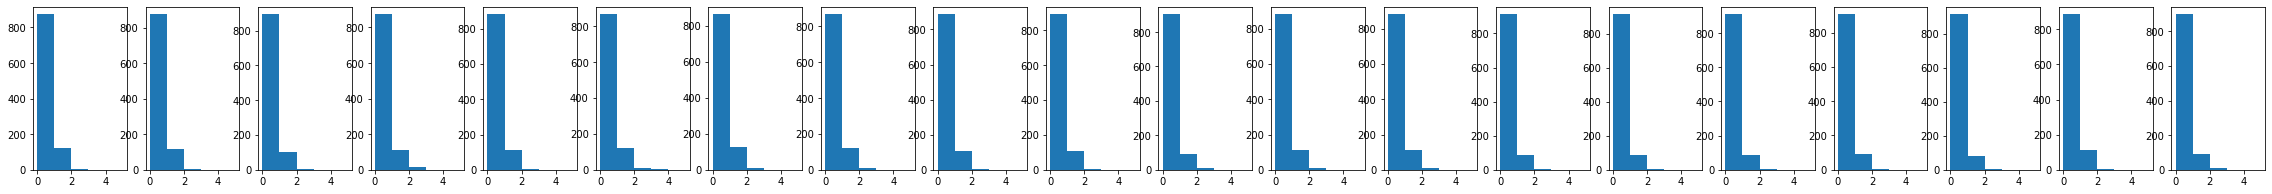

In [82]:
plt.rcParams['figure.figsize'] = [40, 3]
fig, ax = plt.subplots(nrows=1, ncols=len(conf_range))

max_l_link = torch.max(dataset_l_links_flat)
min_l_link = torch.min(dataset_l_links_flat)

bins = np.arange(min_l_link, max_l_link, dtype=int)
    
for i in range(len(conf_range)):
    conf_i = conf_range[i]
    ax[i].hist(dataset_l_links_flat[conf_i], bins=bins)

In [ ]:
dataset_k_links_allflat = torch.flatten(dataset_k_links_flat, start_dim=0)
dataset_l_links_allflat = torch.flatten(dataset_l_links_flat, start_dim=0)

(array([0., 0., 0., 0., 0., 1., 0., 0.]),
 array([-4, -3, -2, -1,  0,  1,  2,  3,  4]),
 <a list of 8 Patch objects>)

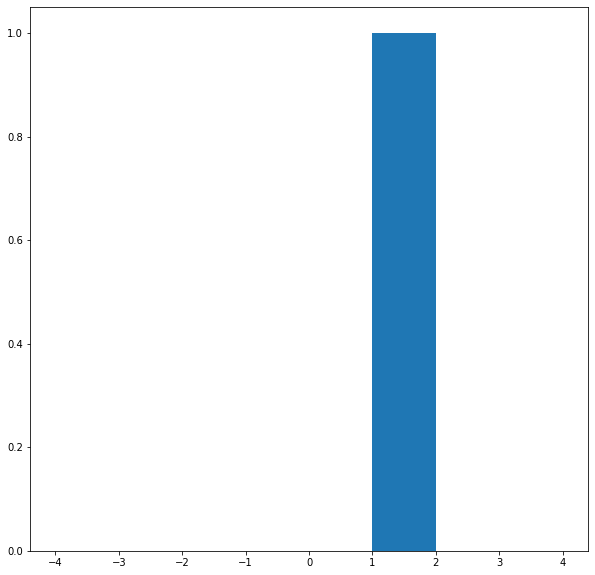

In [85]:
plt.rcParams['figure.figsize'] = [10, 10]

max_k_link = torch.max(dataset_k_links_allflat)
min_k_link = torch.min(dataset_k_links_allflat)

bins = np.arange(min_k_link, max_k_link, dtype=int)

plt.hist(dataset_k_links_allflat[conf_i], bins=bins)

(array([1., 0., 0., 0., 0.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

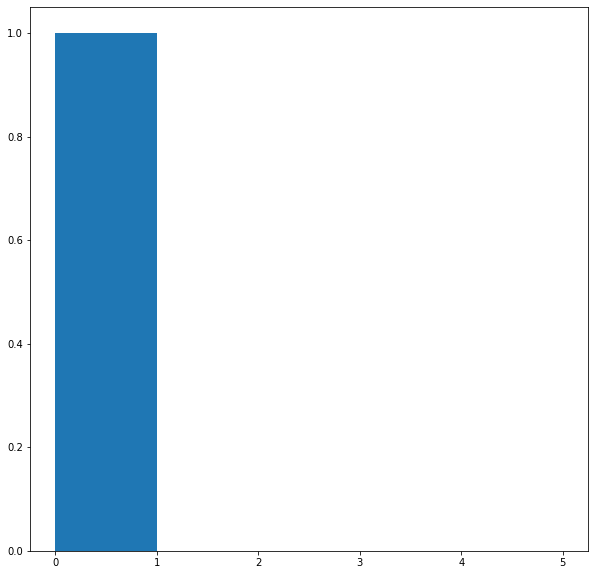

In [93]:
plt.rcParams['figure.figsize'] = [10, 10]

max_l_link = torch.max(dataset_l_links_allflat)
min_l_link = torch.min(dataset_l_links_allflat)

bins = np.arange(min_l_link, max_l_link, dtype=int)

plt.hist(dataset_l_links_allflat[conf_i], bins=bins)

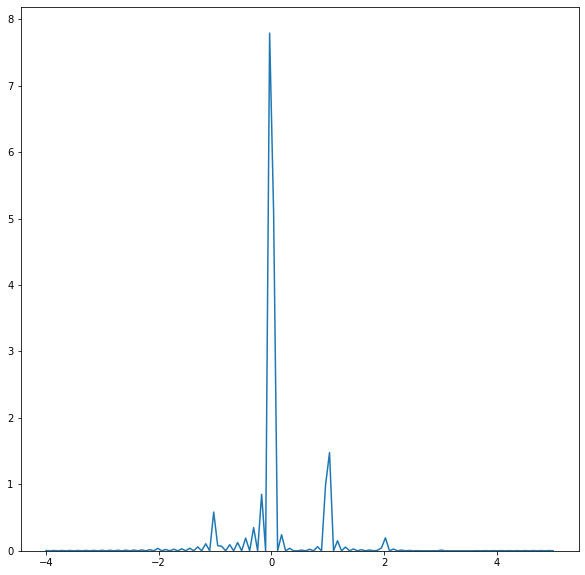

In [91]:
sns.kdeplot(dataset_k_links_allflat.numpy())

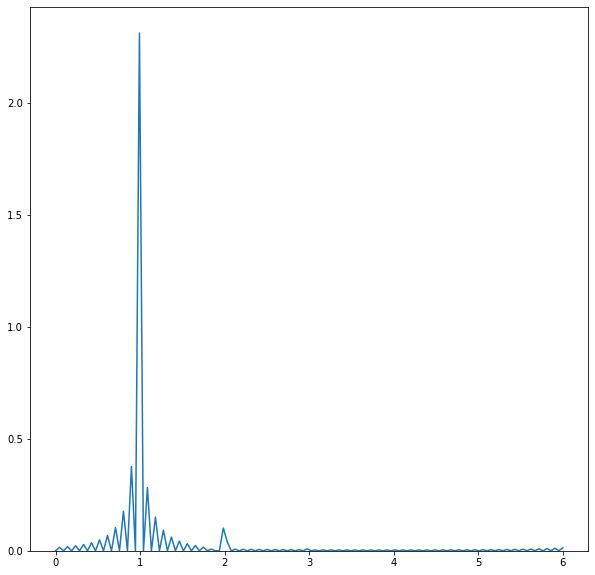

In [90]:
sns.kdeplot(dataset_l_links_allflat.numpy())

In [117]:
"""calcualte f"""
def link_per_lat_point(links, lat_size, dims):

    #empty channels where the linsk on other directions should be saved
    #empty_link_channels = np.zeros(links.shape)
    empty_link_channels = torch.zeros(*links.shape, dtype=int)
    for d in range(dims):
        #print(d)
        #print(links)
        d_links = links[d]
        #print(d_links)
        #perm_links = np.roll(d_links, shift=1, axis=d)
        perm_links = torch.roll(d_links, shifts=1, dims=d)
        #print(perm_links)
        
        #print(d_slices)
        #empty_link_channels[d] = links[zip(d_slices)]
        empty_link_channels[d] = perm_links
        
        
        #complete_links = np.concatenate((links,empty_link_channels), axis=0)
        complete_links = torch.cat((links,empty_link_channels), dim=0)
            
            
    return complete_links

def f_calc(k_links, l_links, lat_size, dims):
    full_k_links = link_per_lat_point(k_links, lat_size, dims)
    full_l_links = link_per_lat_point(l_links, lat_size, dims)
    #print(full_k_links.shape)
    #print(full_l_links.shape)
    
    abs_full_k_links = np.abs(full_k_links)
    abs_full_k_links = torch.abs(full_k_links)
    
    #calc_f = (abs_full_k_links + 2*full_l_links).sum(axis=0).astype(int)
    calc_f = (abs_full_k_links + 2*full_l_links).sum(axis=0)

    #return calc_f.astype(int)
    return calc_f

In [118]:
"""plot f and mean f distribution"""

dataset_f = torch.zeros(len(dataset),*lat_size, dtype=int)

for conf_i in tqdm(range(len(dataset))):
    dataset_f[conf_i] = f_calc(dataset_k_links[conf_i], dataset_l_links[conf_i], lat_size, len(lat_size))


In [115]:
conf_i = 0
np.all(dataset_f[conf_i].numpy() % 2 == 0)

False

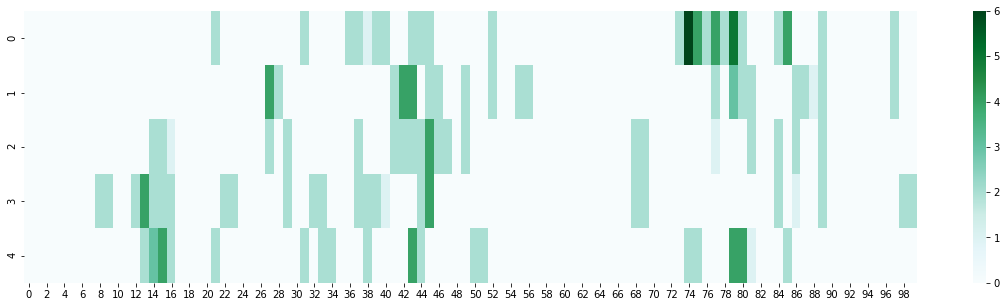

In [107]:
plt.rcParams['figure.figsize'] = [20, 5]
conf_i = 0
sns.heatmap(dataset_f[conf_i], cmap="BuGn")

(array([392.,   7.,  84.,   2.,  14.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

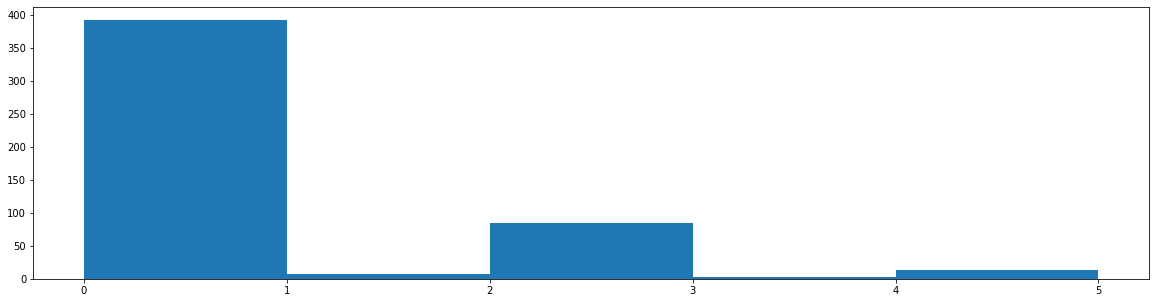

In [112]:
plt.rcParams['figure.figsize'] = [20, 5]

dataset_f_flat = torch.flatten(dataset_f, start_dim=1)

f_min = torch.min(dataset_f_flat)
f_max = torch.max(dataset_f_flat)

bins = np.arange(f_min, f_max, dtype=int)

plt.hist(dataset_f_flat, bins=bins)